<a href="https://colab.research.google.com/github/smitpatel201/IntroToMachineLearning/blob/main/HW2_Smit_Patel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

housing.shape

# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(112)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

y_train = df_train.pop('price')
X_train = df_train
X_train.head()

Mounted at /content/drive


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8050,3,1,1,1,1,1,0,1,1,0,furnished
41,6360,3,2,4,1,0,0,0,1,0,1,furnished
91,6750,2,1,1,1,1,1,0,0,2,1,furnished
118,6420,3,1,1,1,0,1,0,1,0,1,furnished
472,3630,4,1,2,1,0,0,0,0,3,0,semi-furnished


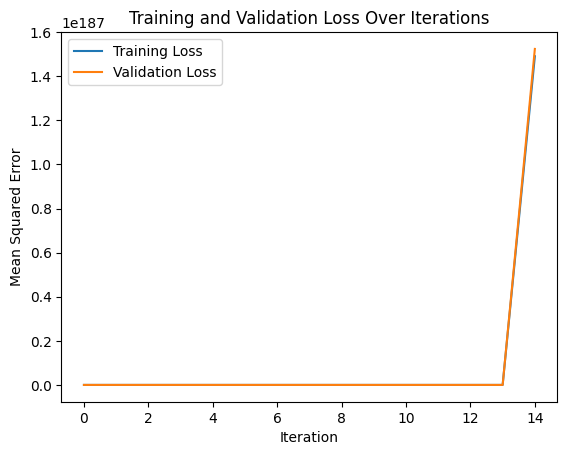

Best Parameters: [1.14602935e+86 6.92496025e+89 3.41721206e+86 1.52492209e+86
 2.11170484e+86 9.78116214e+85]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1A
# 1. Select the data for the specific input features and target output
selected_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = df_train[selected_features].values
y = y_train.values.reshape(-1,1)

# 2. Split the data into training and validation sets
X_train = X
y_train = y
X_val = df_test[selected_features].values
y_val = df_test['price'].values.reshape(-1,1)

# 3. Train a simple linear regression model using gradient descent
learning_rate = 0.01
n_iterations = 15
m = len(X_train)

# initial values
theta = np.zeros((X_train.shape[1]+ 1,1))

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= learning_rate * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

# 4. Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

print(f"Best Parameters: {theta.ravel()}")

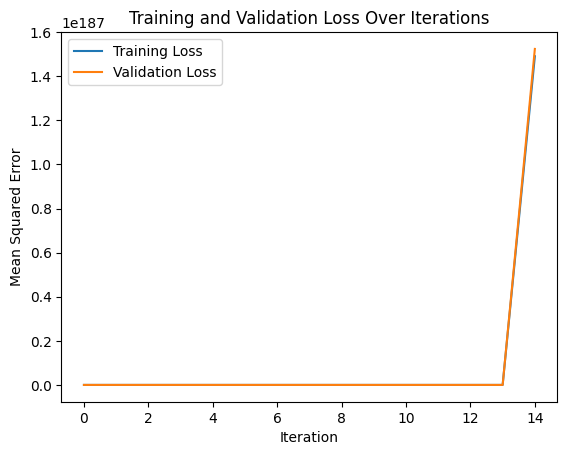

Best Parameters: [1.14602988e+86 6.92496342e+89 3.41721363e+86 1.52492279e+86
 2.11170582e+86 1.03893387e+86 2.25463961e+85 4.22624565e+85
 6.36176971e+84 3.89521215e+85 9.78116664e+85 3.09482099e+85]


In [3]:
## Question 1B
# 1. Select the data for the specific input features and target output
selected_features = ['area', 'bedrooms', 'bathrooms', 'stories',
                     'mainroad', 'guestroom', 'basement', 'hotwaterheating',
                     'airconditioning', 'parking', 'prefarea']
X = df_train[selected_features].values
y = y_train.reshape(-1,1)

# 2. Split the data into training and validation sets
X_train = X
y_train = y
X_val = df_test[selected_features].values
y_val = df_test['price'].values.reshape(-1,1)

# 3. Train a simple linear regression model using gradient descent
learning_rate = 0.01
n_iterations = 15
m = len(X_train)

# initial values
theta = np.zeros((X_train.shape[1]+ 1,1))

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= learning_rate * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

# 4. Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

print(f"Best Parameters: {theta.ravel()}")

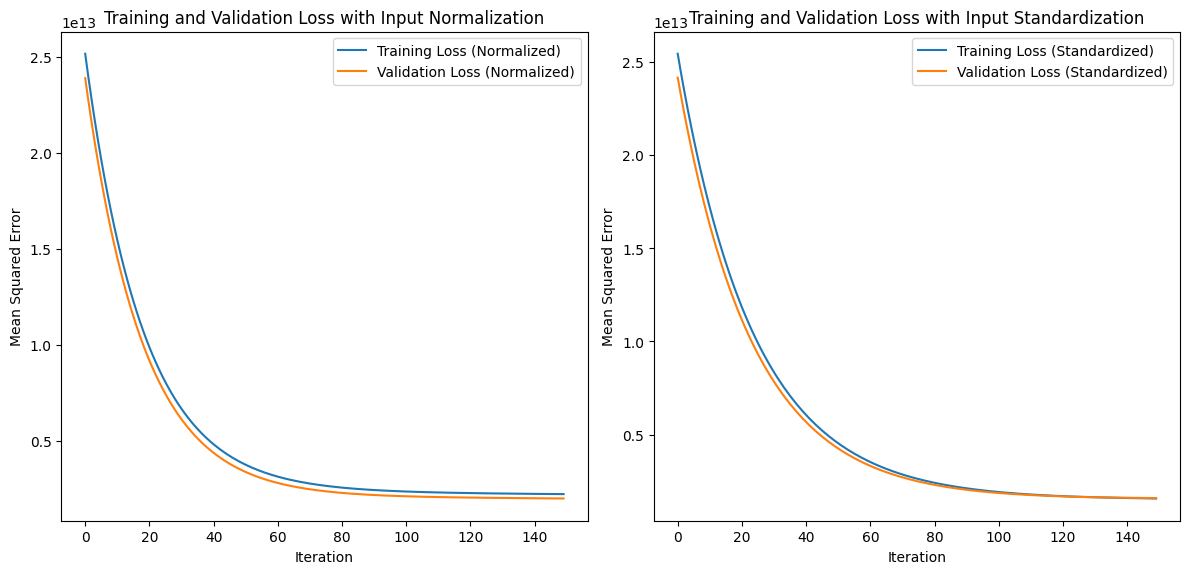

Baseline Training Loss (No Scaling): 1.4909717964160565e+187
Training Loss with Input Normalization: 2205606181012.5425
Training Loss with Input Standardization: 1579605341135.507
Input Standardization achieves the best training accuracy.


In [4]:
## Question 2A
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Question 1A - Repeat with Input Normalization and Standardization
# 1. Select the data for the specific input features and target output
selected_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = df_train[selected_features].values
y = y_train.reshape(-1, 1)

# 2. Split the data into training and validation sets
X_train = X
y_train = y
X_val = df_test[selected_features].values
y_val = df_test['price'].values.reshape(-1, 1)

# Initialize scalers for normalization and standardization
normalization_scaler = MinMaxScaler()
standardization_scaler = StandardScaler()

# Normalize and standardize the input features separately
X_train_normalized = normalization_scaler.fit_transform(X_train)
X_train_standardized = standardization_scaler.fit_transform(X_train)

X_val_normalized = normalization_scaler.transform(X_val)
X_val_standardized = standardization_scaler.transform(X_val)

# Lists to store training and validation losses for both scaling approaches
train_losses_normalized = []
val_losses_normalized = []
train_losses_standardized = []
val_losses_standardized = []

# 3. Train a simple linear regression model using gradient descent for both scaling approaches
learning_rate = 0.01
n_iterations = 150
m = len(X_train)

# Initial values for both scaling approaches
theta_normalized = np.zeros((X_train_normalized.shape[1] + 1, 1))
theta_standardized = np.zeros((X_train_standardized.shape[1] + 1, 1))

X_b_train_normalized = np.c_[np.ones((len(X_train_normalized), 1)), X_train_normalized]
X_b_val_normalized = np.c_[np.ones((len(X_val_normalized), 1)), X_val_normalized]

X_b_train_standardized = np.c_[np.ones((len(X_train_standardized), 1)), X_train_standardized]
X_b_val_standardized = np.c_[np.ones((len(X_val_standardized), 1)), X_val_standardized]

for iteration in range(n_iterations):
    # Update parameters for both scaling approaches
    gradients_normalized = 2/m * X_b_train_normalized.T.dot(X_b_train_normalized.dot(theta_normalized) - y_train)
    gradients_standardized = 2/m * X_b_train_standardized.T.dot(X_b_train_standardized.dot(theta_standardized) - y_train)

    theta_normalized -= learning_rate * gradients_normalized
    theta_standardized -= learning_rate * gradients_standardized

    # Calculate losses for both scaling approaches
    train_loss_normalized = (1/m) * np.sum(np.square(X_b_train_normalized.dot(theta_normalized) - y_train))
    val_loss_normalized = (1/len(X_val_normalized)) * np.sum(np.square(X_b_val_normalized.dot(theta_normalized) - y_val))

    train_loss_standardized = (1/m) * np.sum(np.square(X_b_train_standardized.dot(theta_standardized) - y_train))
    val_loss_standardized = (1/len(X_val_standardized)) * np.sum(np.square(X_b_val_standardized.dot(theta_standardized) - y_val))

    # Append losses to their respective lists
    train_losses_normalized.append(train_loss_normalized)
    val_losses_normalized.append(val_loss_normalized)
    train_losses_standardized.append(train_loss_standardized)
    val_losses_standardized.append(val_loss_standardized)

# 4. Plot the training and validation losses for both scaling approaches
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses_normalized, label="Training Loss (Normalized)")
plt.plot(val_losses_normalized, label="Validation Loss (Normalized)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss with Input Normalization")

plt.subplot(1, 2, 2)
plt.plot(train_losses_standardized, label="Training Loss (Standardized)")
plt.plot(val_losses_standardized, label="Validation Loss (Standardized)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss with Input Standardization")

plt.tight_layout()
plt.show()

# Compare the training accuracy between both scaling approaches and the baseline
baseline_train_loss = train_losses[-1]
print(f"Baseline Training Loss (No Scaling): {baseline_train_loss}")

train_loss_normalized = train_losses_normalized[-1]
print(f"Training Loss with Input Normalization: {train_loss_normalized}")

train_loss_standardized = train_losses_standardized[-1]
print(f"Training Loss with Input Standardization: {train_loss_standardized}")

# Explanation of results
if train_loss_normalized < train_loss_standardized:
    print("Input Normalization achieves the best training accuracy.")
else:
    print("Input Standardization achieves the best training accuracy.")

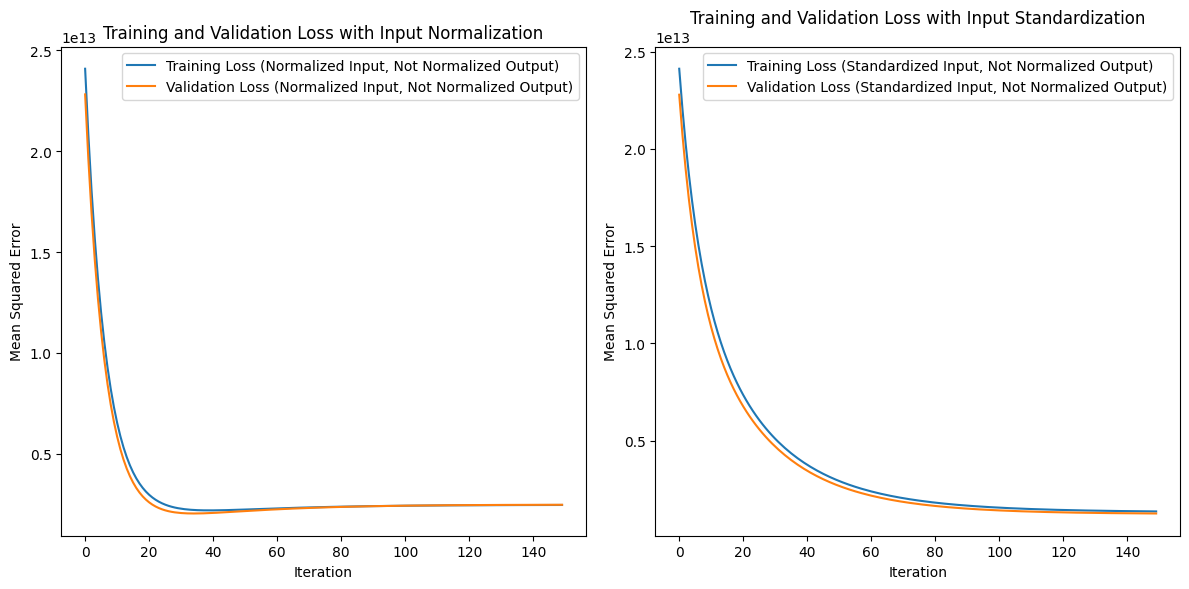

Baseline Training Loss (No Scaling): 1.4909717964160565e+187
Training Loss (Normalized Input, Not Normalized Output): 2468441902842.9355
Training Loss (Standardized Input, Not Normalized Output): 1369326439232.8733


In [5]:
## Question 2B
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Question 2B - Training with Input Normalization and Standardization
# 1. Select the data for the specific input features and target output
selected_features = ['area', 'bedrooms', 'bathrooms', 'stories',
                     'mainroad', 'guestroom', 'basement', 'hotwaterheating',
                     'airconditioning', 'parking', 'prefarea']
X = df_train[selected_features].values
y = y_train.reshape(-1, 1)

# 2. Split the data into training and validation sets
X_train = X
y_train = y
X_val = df_test[selected_features].values
y_val = df_test['price'].values.reshape(-1, 1)

# Initialize scalers for normalization and standardization
normalization_scaler = MinMaxScaler()
standardization_scaler = StandardScaler()

# Normalize and standardize the input features separately
X_train_normalized = normalization_scaler.fit_transform(X_train)
X_train_standardized = standardization_scaler.fit_transform(X_train)

X_val_normalized = normalization_scaler.transform(X_val)
X_val_standardized = standardization_scaler.transform(X_val)

# Lists to store training and validation losses for different scenarios
train_losses_normalized_not_normalized = []
val_losses_normalized_not_normalized = []
train_losses_standardized_not_normalized = []
val_losses_standardized_not_normalized = []

# 3. Train linear regression models for different scenarios
learning_rate = 0.01
n_iterations = 150
m = len(X_train)

# Initial values for all scenarios
theta = np.zeros((X_train.shape[1] + 1, 1))

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

X_b_train_normalized = np.c_[np.ones((len(X_train_normalized), 1)), X_train_normalized]
X_b_val_normalized = np.c_[np.ones((len(X_val_normalized), 1)), X_val_normalized]

X_b_train_standardized = np.c_[np.ones((len(X_train_standardized), 1)), X_train_standardized]
X_b_val_standardized = np.c_[np.ones((len(X_val_standardized), 1)), X_val_standardized]

# Training loop for each scenario
for iteration in range(n_iterations):
    # Normalize input, but not output
    gradients = 2/m * X_b_train_normalized.T.dot(X_b_train_normalized.dot(theta) - y_train)
    theta -= learning_rate * gradients

    # Calculate losses
    train_loss = (1/m) * np.sum(np.square(X_b_train_normalized.dot(theta) - y_train))
    val_loss = (1/len(X_val_normalized)) * np.sum(np.square(X_b_val_normalized.dot(theta) - y_val))

    train_losses_normalized_not_normalized.append(train_loss)
    val_losses_normalized_not_normalized.append(val_loss)

    # Standardize input, but not output
    gradients = 2/m * X_b_train_standardized.T.dot(X_b_train_standardized.dot(theta) - y_train)
    theta -= learning_rate * gradients

    # Calculate losses
    train_loss = (1/m) * np.sum(np.square(X_b_train_standardized.dot(theta) - y_train))
    val_loss = (1/len(X_val_standardized)) * np.sum(np.square(X_b_val_standardized.dot(theta) - y_val))

    train_losses_standardized_not_normalized.append(train_loss)
    val_losses_standardized_not_normalized.append(val_loss)

# 4. Plot the training and validation losses for different scenarios
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses_normalized_not_normalized, label="Training Loss (Normalized Input, Not Normalized Output)")
plt.plot(val_losses_normalized_not_normalized, label="Validation Loss (Normalized Input, Not Normalized Output)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss with Input Normalization")

plt.subplot(1, 2, 2)
plt.plot(train_losses_standardized_not_normalized, label="Training Loss (Standardized Input, Not Normalized Output)")
plt.plot(val_losses_standardized_not_normalized, label="Validation Loss (Standardized Input, Not Normalized Output)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss with Input Standardization")

plt.tight_layout()
plt.show()

# Compare the training accuracy between different scenarios
baseline_train_loss = train_losses[-1]
print(f"Baseline Training Loss (No Scaling): {baseline_train_loss}")

train_loss_normalized_not_normalized = train_losses_normalized_not_normalized[-1]
print(f"Training Loss (Normalized Input, Not Normalized Output): {train_loss_normalized_not_normalized}")

train_loss_standardized_not_normalized = train_losses_standardized_not_normalized[-1]
print(f"Training Loss (Standardized Input, Not Normalized Output): {train_loss_standardized_not_normalized}")


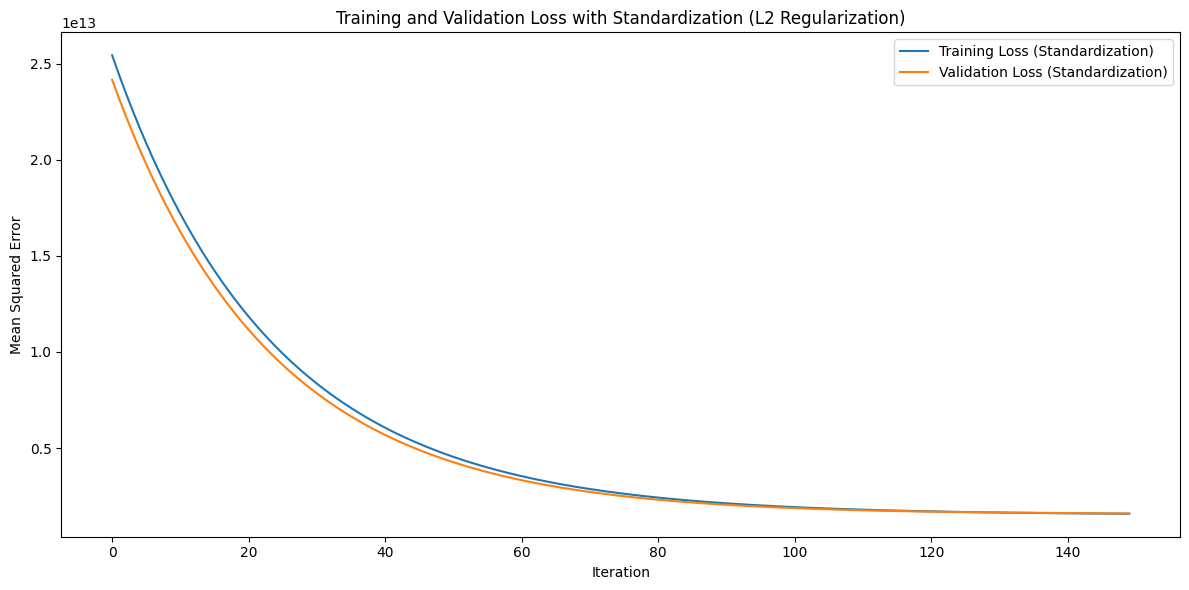

Best Training Loss with Standardization (L2 Regularization): 1580240160971.6882
Input Standardization with L2 Regularization achieves the best training accuracy.


In [6]:
## Question 3A
## Problem 2B - Repeat with Parameter Penalty
# 1. Select the data for the specific input features and target output
selected_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = df_train[selected_features].values
y = y_train.reshape(-1, 1)

# 2. Split the data into training and validation sets
X_train = X
y_train = y
X_val = df_test[selected_features].values
y_val = df_test['price'].values.reshape(-1, 1)

# Initialize scalers for normalization and standardization
normalization_scaler = MinMaxScaler()
standardization_scaler = StandardScaler()

# Normalize and standardize the input features separately
X_train_normalized = normalization_scaler.fit_transform(X_train)
X_train_standardized = standardization_scaler.fit_transform(X_train)

X_val_normalized = normalization_scaler.transform(X_val)
X_val_standardized = standardization_scaler.transform(X_val)

# Lists to store training and validation losses for both scaling approaches
train_losses_normalized = []
val_losses_normalized = []
train_losses_standardized = []
val_losses_standardized = []

# 3. Train a linear regression model using gradient descent with L2 regularization for both scaling approaches
learning_rate = 0.01
n_iterations = 150
m = len(X_train)

# Define the regularization parameter (lambda)
lambda_param = 0.15

# Initial values for both scaling approaches
theta_normalized = np.zeros((X_train_normalized.shape[1] + 1, 1))
theta_standardized = np.zeros((X_train_standardized.shape[1] + 1, 1))

X_b_train_normalized = np.c_[np.ones((len(X_train_normalized), 1)), X_train_normalized]
X_b_val_normalized = np.c_[np.ones((len(X_val_normalized), 1)), X_val_normalized]

X_b_train_standardized = np.c_[np.ones((len(X_train_standardized), 1)), X_train_standardized]
X_b_val_standardized = np.c_[np.ones((len(X_val_standardized), 1)), X_val_standardized]

for iteration in range(n_iterations):
    # Update parameters for both scaling approaches with L2 regularization
    gradients_normalized = (2/m) * (X_b_train_normalized.T.dot(X_b_train_normalized.dot(theta_normalized) - y_train) + lambda_param * theta_normalized)
    gradients_standardized = (2/m) * (X_b_train_standardized.T.dot(X_b_train_standardized.dot(theta_standardized) - y_train) + lambda_param * theta_standardized)

    theta_normalized -= learning_rate * gradients_normalized
    theta_standardized -= learning_rate * gradients_standardized

    # Calculate losses for both scaling approaches (without regularization)
    train_loss_normalized = (1/m) * np.sum(np.square(X_b_train_normalized.dot(theta_normalized) - y_train))
    val_loss_normalized = (1/len(X_val_normalized)) * np.sum(np.square(X_b_val_normalized.dot(theta_normalized) - y_val))

    train_loss_standardized = (1/m) * np.sum(np.square(X_b_train_standardized.dot(theta_standardized) - y_train))
    val_loss_standardized = (1/len(X_val_standardized)) * np.sum(np.square(X_b_val_standardized.dot(theta_standardized) - y_val))

    # Append losses to their respective lists
    train_losses_normalized.append(train_loss_normalized)
    val_losses_normalized.append(val_loss_normalized)
    train_losses_standardized.append(train_loss_standardized)
    val_losses_standardized.append(val_loss_standardized)

# 4. Plot the training and validation losses for the best input scaling approach (standardization or normalization)
best_approach = "Normalization" if train_loss_normalized < train_loss_standardized else "Standardization"
best_train_losses = train_losses_normalized if train_loss_normalized < train_loss_standardized else train_losses_standardized
best_val_losses = val_losses_normalized if train_loss_normalized < train_loss_standardized else val_losses_standardized

plt.figure(figsize=(12, 6))
plt.plot(best_train_losses, label=f"Training Loss ({best_approach})")
plt.plot(best_val_losses, label=f"Validation Loss ({best_approach})")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title(f"Training and Validation Loss with {best_approach} (L2 Regularization)")

plt.tight_layout()
plt.show()

# Compare the results with problem 2A
print(f"Best Training Loss with {best_approach} (L2 Regularization): {best_train_losses[-1]}")

# Explanation of results
if best_approach == "Normalization":
    print("Input Normalization with L2 Regularization achieves the best training accuracy.")
else:
    print("Input Standardization with L2 Regularization achieves the best training accuracy.")


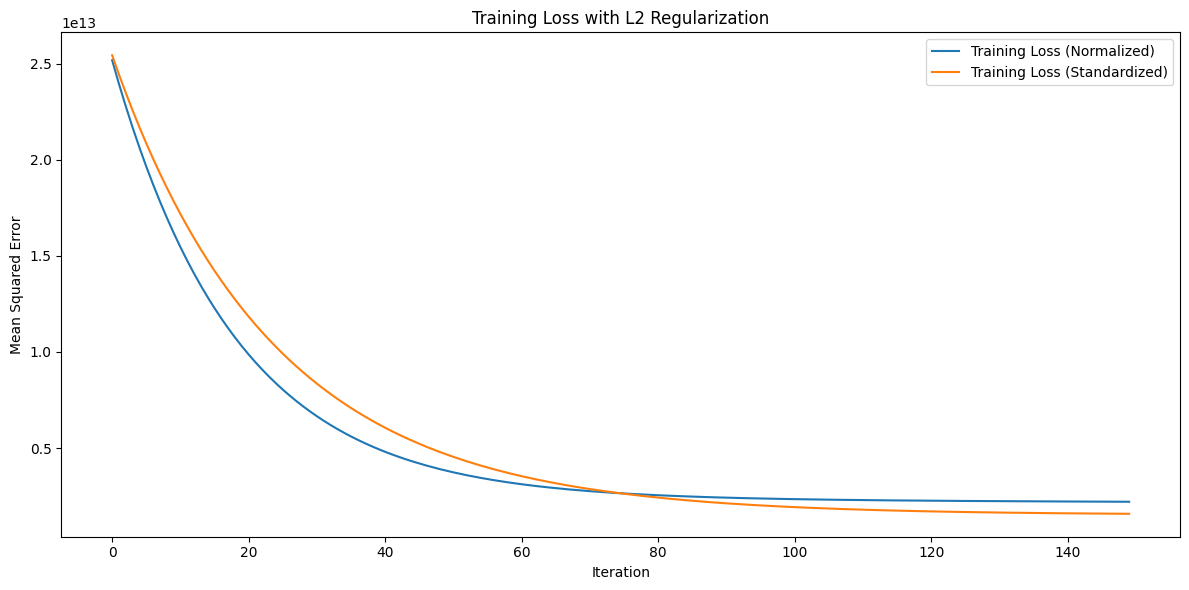

Best Input Scaling Approach (L2 Regularization): Standardization
Validation Loss with Standardization: 1600980626060.3398


In [7]:
## Question 3B
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the regularization parameter (lambda)
lambda_param = 0.1

# Function to perform gradient descent with L2 regularization
def gradient_descent_with_regularization(X, y, theta, learning_rate, iterations, lambda_param):
    m = len(X)
    history = []

    for _ in range(iterations):
        gradients = (2/m) * (X.T.dot(X.dot(theta) - y) + lambda_param * theta)
        theta -= learning_rate * gradients
        loss = (1/m) * np.sum(np.square(X.dot(theta) - y)) + (lambda_param / (2 * m)) * np.sum(np.square(theta[1:]))
        history.append(loss)

    return theta, history

# Select the data for the specific input features and target output
selected_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = df_train[selected_features].values
y = y_train.reshape(-1, 1)

# Split the data into training and validation sets
X_train = X
y_train = y
X_val = df_test[selected_features].values
y_val = df_test['price'].values.reshape(-1, 1)

# Initialize scalers for normalization and standardization
normalization_scaler = MinMaxScaler()
standardization_scaler = StandardScaler()

# Normalize and standardize the input features separately
X_train_normalized = normalization_scaler.fit_transform(X_train)
X_val_normalized = normalization_scaler.transform(X_val)

X_train_standardized = standardization_scaler.fit_transform(X_train)
X_val_standardized = standardization_scaler.transform(X_val)

# Add bias term (intercept) to input features
X_train_normalized = np.c_[np.ones((len(X_train_normalized), 1)), X_train_normalized]
X_val_normalized = np.c_[np.ones((len(X_val_normalized), 1)), X_val_normalized]

X_train_standardized = np.c_[np.ones((len(X_train_standardized), 1)), X_train_standardized]
X_val_standardized = np.c_[np.ones((len(X_val_standardized), 1)), X_val_standardized]

# Initialize parameters
theta_normalized = np.zeros((X_train_normalized.shape[1], 1))
theta_standardized = np.zeros((X_train_standardized.shape[1], 1))

# Set hyperparameters
learning_rate = 0.01
n_iterations = 150

# Perform gradient descent with L2 regularization for both scaling approaches
theta_normalized, history_normalized = gradient_descent_with_regularization(
    X_train_normalized, y_train, theta_normalized, learning_rate, n_iterations, lambda_param)

theta_standardized, history_standardized = gradient_descent_with_regularization(
    X_train_standardized, y_train, theta_standardized, learning_rate, n_iterations, lambda_param)

# Plot the training and validation losses for both scaling approaches
plt.figure(figsize=(12, 6))
plt.plot(history_normalized, label="Training Loss (Normalized)")
plt.plot(history_standardized, label="Training Loss (Standardized)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training Loss with L2 Regularization")

plt.tight_layout()
plt.show()

# Calculate validation loss for both scaling approaches
val_loss_normalized = (1/len(X_val_normalized)) * np.sum(np.square(X_val_normalized.dot(theta_normalized) - y_val))
val_loss_standardized = (1/len(X_val_standardized)) * np.sum(np.square(X_val_standardized.dot(theta_standardized) - y_val))

# Compare the results
if val_loss_normalized < val_loss_standardized:
    best_scaling_approach = "Normalization"
    best_theta = theta_normalized
    best_val_loss = val_loss_normalized
else:
    best_scaling_approach = "Standardization"
    best_theta = theta_standardized
    best_val_loss = val_loss_standardized

print(f"Best Input Scaling Approach (L2 Regularization): {best_scaling_approach}")
print(f"Validation Loss with {best_scaling_approach}: {best_val_loss}")
